# <span style="color:red;">FOR THIS LAB, PLEASE, USE THE LATEST ANACONDA KERNEL OF 2023 </span> (the first in the list in Anaconda.cloud when you create a new document) {.unnumbered}


# Maximal likelihood estimation

### Reminder about the theory {.unnumbered}

Let $X$ be a random variable whose distribution depends on a parameter $\theta\in\mathbb{R}$, or on a group of parameters, $\theta=(\theta_1,\ldots,\theta_k)$. Let $x_1,\ldots,x_n$ be a sample of values of the random variable $X$. The **likelihood function** $\mathcal{L}(\theta\mid x_1,\ldots,x_n)$ is defined as follows:

* for a discrete random variable $X$ with the probability mass function $p_X(x)=\mathbb{P}(X=x)$,

$$
\mathcal{L}(\theta\mid x_1,\ldots,x_n) = p_X(x_1)\cdot\ldots\cdot p_X(x_n);
$$

* for a continuous random variable $X$ with the probability density function $f_X(x)$,

$$
\mathcal{L}(\theta\mid x_1,\ldots,x_n) = f_X(x_1)\cdot\ldots\cdot f_X(x_n).
$$

The **log-likelihood** function is the (natural) logarithm of the likelihood:

$$
\begin{aligned}
L(\theta\mid x_1,\ldots,x_n): &= \ln \mathcal{L}(\theta\mid x_1,\ldots,x_n)\\
&= \ln p_X(x_1)+\ldots + \ln p_X(x_n)
\end{aligned}
$$

for the discrete case; and the same formula with $p_X$ replaced by $f_X$ holds for the continuous case.

### Fitting data in Python {.unnumbered}

Suppose we are given a sample

In [1]:
#| echo: true
#| code-fold: false
import numpy as np
data = np.array([8,  4,  7, 11,  9,  7,  5,  9,  8,  7])

And suppose that we are told that this is a sample generated by a binomial random variable $X\sim Bin(20,p)$, i.e $X:\Omega\to\{0,1,\ldots,20\}$ with

$$
\mathbb{P}(X=k)= \binom{20}{k} p^k (1-p)^{n-k}.
$$

however, the probability $p$ of a "success" is unknown (i.e. here $\theta=p$). One needs to find the value of $p$ which would make the probability to observe `data` the highest possible.

The following code would do the needed:

In [2]:
#| echo: true
#| code-fold: false
from scipy.stats import binom, fit
bounds = [(20,20), (0, 1)]
fit(binom, data, bounds)

  params: FitParams(n=20.0, p=0.3749999998235724, loc=0.0)
 success: True
 message: 'Optimization terminated successfully.'

Let's discuss this code from the end. The function `fit` has three arguments: 

* `binom` is the class of the distributions (from `scipy.stats`) in which we are looking for a best fit;

* `data` is the given sample;

* `bounds` sets bounds for the parameters of the considered distribution: in this case, `binom` has two parameters: $X\sim Bin(n,p)$, i.e. there are $n$ and $p$. $n$ is given to be $20$ (we know the number of attempts), whereas $p\in[0,1]$ is the unknown probability. Note that `bounds` is a Python list, whose entries are **tuples**. Tuples are very similar to lists, the main difference is that the tuple can't be changed after it is defined (whereas a list may be e.g. extended or some its elements may be changed or removed). Each tuple sets the lower and the upper bounds for the corresponding parameter. So, for $n$ we request  $20\leq n\leq 20$ (that just means $n=20$, as needed), and for $p$ we have $0\leq p\leq 1$.

The output tells us that the best possible $n=20.0$ (that is not surprising as we requested this) and the best possible $p\approx 0.375$ (we ignore `loc` for now). The values are accessible:

In [3]:
#| echo: true
#| code-fold: false
res = fit(binom, data, bounds)
res.params

FitParams(n=20.0, p=0.374999996648153, loc=0.0)

so that there are two parameters, and the maximum likelihood estimator is the second of them:

In [4]:
#| echo: true
#| code-fold: false
res.params[1]

0.374999996648153

(and `res.params[0]` would return `20.0`).

:::{.remark}
You may notice that the values of `p` appeared to be slightly different. It's because the internal algorithm of how `fit` maximises the likelihood function is the so-called stochastic algorithm, it has a random output (though pretty close to the "real" point of maximum).
:::

In the first task, we will test the work of `fit` function for the case when we know the answer. Recall that, to generate e.g. $5$ values (outputs) of a Bernoulli random variable $X\in\{0,1\}$ with $\mathbb{P}(X=1)=p$ for some $p$, e.g. for $p=0.4$, we need to use the code

In [5]:
#| echo: true
#| code-fold: false
from scipy.stats import bernoulli
p = 0.4
bernoulli.rvs(p, size = 5, random_state = 10)

array([1, 0, 1, 1, 0], dtype=int64)

Here, recall, `random_state` can be any integer number, but if you use `10` your output will be exactly like above.

:::{.remark}
Note also that you could write here more "full" code

In [6]:
#| echo: true
#| code-fold: false
bernoulli.rvs(p = p, size = 5, random_state = 10)

array([1, 0, 1, 1, 0], dtype=int64)

Don't be confused with `p = p`: the first `p` here is the name of an argument of function `bernoulli.rvs` (indeed, just such a short name), where the second `p` in `p = p` is the name of the variable we defined previously. Python allows such clashes (as it is clear what is what). Moreover, this is a kind of standard coding practice.

:::

##
:::{.task}
Generate $n = 100$ values of a Bernoulli random variable $X$ with $\mathbb{P}(X=1)=0.3$, using `random_state = 100`, and assign the resulting Numpy-array to the variable `data_ber`. 
:::

In [7]:
n = 100
p = 0.3
data_ber = bernoulli.rvs(p, size = n, random_state = 100)

Check the output by calculating its sum:

In [8]:
#| echo: true
#| code-fold: false
data_ber.sum()

25

Stress that the calculated sum is the number of $1$-s in the generated data.

##
:::{.task}
Find the maximum likelihood estimate for $p=\mathbb{P}(X=1)$, using `fit` function for the data `data_ber` (**stress that `bernoulli` has only one parameter**, denoted below by `p`, hence, `bounds` should contain only one tuple for the range of $p\in[0,1]$). Assign the result to `res_ber`.
:::

In [9]:
res_ber = fit(bernoulli, data_ber, bounds = [(0,1)])

Check the output:

In [10]:
res_ber.params

FitParams(p=0.2499999884310177, loc=0.0)

As we can see, the answer is pretty close to the real maximum likelihood estimate (known from lectures), which $\frac{k}{n}$, where $k$ is the number of $1$-s and $n$ is the total number of trials: the absolution value of the difference:

In [11]:
#| echo: true
#| code-fold: false
np.abs(data_ber.sum()/n - res_ber.params[0])

1.1568982299925423e-08

On the other hand, the maximum likelihood estimator does not recover the real probability `p = 0.3` with which the data `data_ber` was generated. This because the sample size is relatively small.

##
:::{.task}
Repeat the previous steps but generate now a sample of the size $n = 100000$. Assign the output of `fit` function to `res_big_ber`.
:::

In [12]:
n = 100000
p = 0.3
data_ber = bernoulli.rvs(p, size = n, random_state = 100)
res_big_ber = fit(bernoulli, data_ber, bounds = [(0,1)])

Check the found value:

In [13]:
#| echo: true
#| code-fold: false
res_big_ber.params[0]

0.2998799979486279

so the result is much closer to $0.3$.

### Maximum likelihood estimation of several parameters at once {.unnumbered}

Let's now return back to the dataset `data`. Suppose now that we know only that it follows the binomial distribution: $X\sim Bin(n,p)$, where $n$ is not know exactly, but we expect that $1\leq n\leq 25$. We can then modify the bounds for $n$:

In [14]:
#| echo: true
#| code-fold: false
bounds = [(1, 25), (0, 1)]
res = fit(binom, data, bounds)
res.params

FitParams(n=14.0, p=0.535714285873418, loc=0.0)

Thus, the highest probability to see the sample `data`, for the given restriction on $n$, would be if $X\sim Bin(14, \approx 0.5357)$.

Moreover, the output of `fit` function (which we denoted `res`) can be plotted:

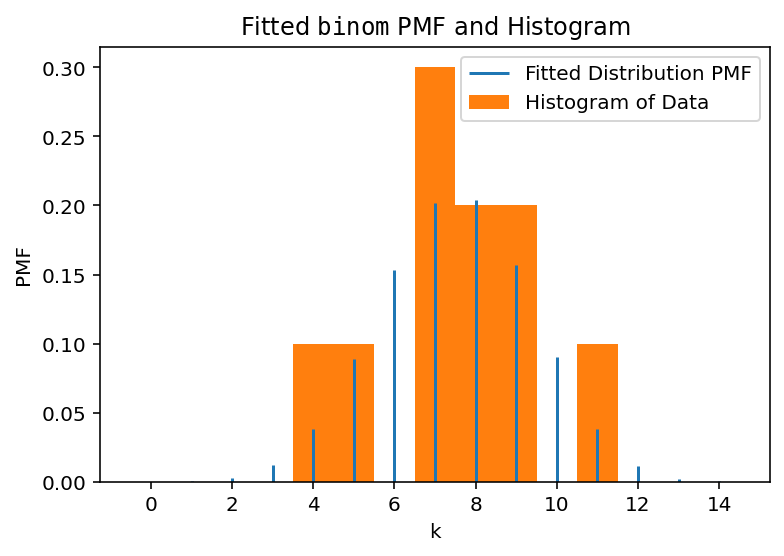

In [15]:
#| echo: true
#| code-fold: false
import matplotlib.pyplot as plt  
res.plot()
plt.show()

:::{.remark}
Similarly, to the tasks above, the data here was initially generated by very different parameters: $X\sim Bin(18, 0.435)$. However, the fitting for so small sample can't reconstruct this. The sample is random, and it appeared that among all $Bin(n,p)$ the distribution $X\sim Bin(14, \approx 0.5357)$ is the closest (the most typical) for such sample.
:::

##
:::{.task}
Generate $n=10$ random values of the normal distribution of $X\sim \mathcal{N}(10, 1.5^2)$ (see Lab 5 (solutions): Task 3.4 for `rvs` function and e.g. Task 3.3 for using `loc` argument for the mean and `scale` for the standard deviation; don't forget to import `norm`). Use `random_state = 123`. Assign the output to `data_norm`.
:::

In [16]:
from scipy.stats import norm
data_norm = norm.rvs(loc = 10, scale = 1.5, size = 10, random_state = 123)

Check yourself by calculating mean and standard deviation of the output:

In [17]:
#| echo: true
#| code-fold: false
[data_norm.mean(), data_norm.std()]

[9.595725834510507, 1.8544572022485344]

As you can see, the sample is not large enough to "catch" the original mean, though, it's relatively close. 

##
:::{.task}
Fit the data to a normal distribution: find the normal distribution $\mathcal{N}(\mu,\sigma^2)$ with $\mu\in [7,12]$ and $\sigma\in[1,2]$ which is most likely to be the distribution for the sample `data_norm`.
Assign the result to `res_norm`.
:::

In [18]:
bounds = [(7, 12), (1,2)]
res_norm = fit(norm, data_norm, bounds)

Check the output:

In [19]:
#| echo: true
#| code-fold: false
res_norm.params

FitParams(loc=9.595725403877836, scale=1.8544565522472232)

As you can see, the fitting reflects the characteristics of the sample, not the initial distribution (as the sample was not large enough).

:::{.remark}
Some of distributions in `scipy.stats` have own `fit` methods which do not require using `bounds`. For example, one can write

In [20]:
#| echo: true
#| code-fold: false
norm.fit(data_norm)

(9.595725834510507, 1.8544572022485344)

In other words, Python looked here among **all** $\mathcal{N}(\mu,\sigma^2)$, without any restrictions on $\mu$ and $\sigma$.
:::

# How we can calculate maximum likelihood estimator manually

Let's return again to `data` sample:

In [21]:
#| echo: true
#| code-fold: false
data

array([ 8,  4,  7, 11,  9,  7,  5,  9,  8,  7])

Suppose we know that it came from $X\sim Bin(20,p)$, and we want to estimate $p$ manually, without using `fit` function. How does `fit` do the estimation? Look at the formulas at the beginning of this Lab.

We can calculate the likelihood function $\mathcal{L}(\theta)$ for each particular value of $\theta = p$. E.g. for $p=0.4$, we can calculate $p_X(x)=\mathbb{P}(X=x)$ for each $x$ from `data`.

In [22]:
#| echo: true
#| code-fold: false
n = 20
p = 0.4
probabilities = binom.pmf(data, n = n, p = p)
probabilities

array([0.17970579, 0.03499079, 0.16588227, 0.07099488, 0.15973848,
       0.16588227, 0.07464702, 0.15973848, 0.17970579, 0.16588227])

We can now calculate the likelihood function at $p=0.4$:

In [23]:
#| echo: true
#| code-fold: false
likelihood = np.prod(probabilities)
likelihood

6.974873531555715e-10

As you can see, the value is pretty small (as it is a product of probabilities which are always less than $1$). It may lead latter to errors, so it is highly recommended to work with log-likelihood instead: we first apply `np.log` function to all entries in `probabilities`. Note that `log` in Numpy stands for $\ln$ (the natural logarithm).

##
:::{.task}
Assign to `logprobabilities` the array of natural logarithms of all entries in `probabilities`. Assign to `loglikelihood` the sum of all these logarithms.
:::

In [24]:
logprobabilities = np.log(probabilities) 
loglikelihood = logprobabilities.sum() # or np.sum(log-probabilities)

Check the output:

In [25]:
#| echo: true
#| code-fold: false
loglikelihood

-21.08353673407401

:::{.remark}
Note that the distributions in `scipy.stats` contains functions `logpmf` and `logpdf` for calculation logarithms of PMF (for discrete random variables) and PDF (for continuous random variables), respectively. We could write also:

In [26]:
#| echo: true
#| code-fold: false
logprobabilities = binom.logpmf(data, n = n, p = p)
loglikelihood = logprobabilities.sum()
loglikelihood

-21.08353673407403

:::

Now, we are going to calculate the log-likelihood for a range of $p\in[0,1]$. We, hence, define a function which combines all previous steps. Let's call e.g. `loglbinom`, it will have only one argument: the value of $p$; we keep the value of $n$ and data fixed. We can do this in one line

In [27]:
#| echo: true
#| code-fold: false
def loglbinom(p):
    return binom.logpmf(data, n = n, p = p).sum()

It can be also written "longer":

In [28]:
#| echo: true
#| code-fold: false
def loglbinom1(p):
    probabilities = binom.pmf(data, n = n, p = p)
    logprobabilities = np.log(probabilities) 
    loglikelihood = logprobabilities.sum()
    return loglikelihood

Let's check that it would be the same as in the previous computations for $p=0.4$:

In [29]:
#| echo: true
#| code-fold: false
[loglbinom(0.4), loglbinom1(0.4)]

[-21.08353673407403, -21.08353673407401]

so both of course coincides with the previously found `loglikelihood`.

We are going to apply `loglbinom` to an array fo values of `p`. For this, we create its vectorised version:

In [30]:
#| echo: true
#| code-fold: false
vloglbinom = np.vectorize(loglbinom)

##
:::{.task}
Define array `x` of 1000 points from $[0,1]$, using `np.linspace` function (see e.g. Lab 4 or Lab 5). Apply the vectorised function `vloglbinom` to `x` (it keeps `n=20` and `data` fixed), and assign the result to `y`. Plot the graph of `y` against `x`.
:::

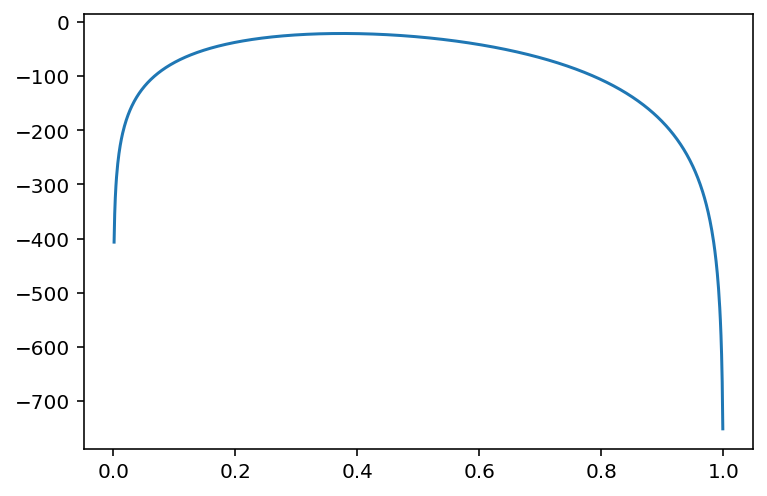

In [31]:
import matplotlib.pyplot as plt
x = np.linspace(0, 1, 1000)
y = vloglbinom(x)
plt.plot(x,y)
plt.show()

And finally, one can find now the point of maximum of the log-likelihood: namely, `np.argmax(y)` returns the **index** in array `y` of the maximal element:

In [32]:
#| echo: true
#| code-fold: false
ind_max = np.argmax(y)

therefore, the value `y[ind_max]` is the maximal value of the log-likelihood function. However, we are interested in the argument, that is the corresponding `x[ind_max]`:

In [33]:
#| echo: true
#| code-fold: false
x[ind_max]

0.37537537537537535

that is pretty close to the initially found value. (Surely, if we divide $[0,1]$ on a larger number of pieces, the prediction will be better.)

The following graph has the vertical line at the found value of `x[ind_max]`, as you can see, it comes (pretty close) to the maximum of the log-likelihood function.

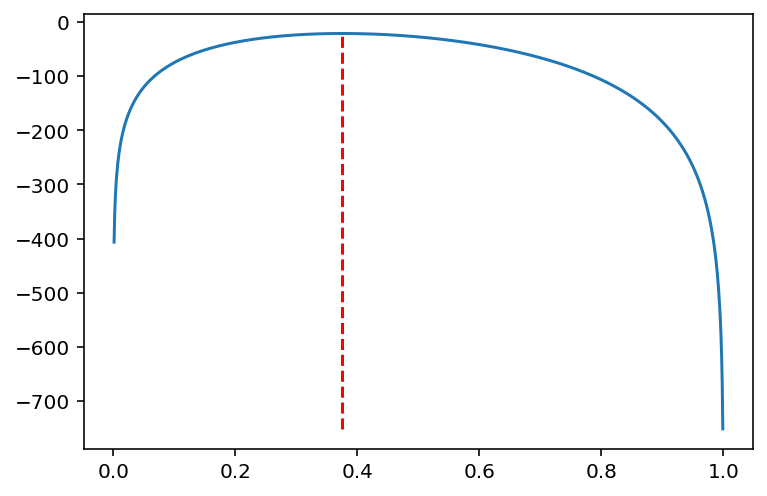

In [34]:
import matplotlib.pyplot as plt
x = np.linspace(0, 1, 1000)
y = vloglbinom(x)
x0 = x[ind_max]
y0 = y[ind_max]
plt.plot(x,y)
plt.vlines(x=x0, ymin = np.min(y[1:-1]), ymax = np.max(y), color = 'r', linestyles = 'dashed')
plt.show()